# Phase 2 - Milestone 1

**Ediashta Revindra Amirussalam**

FTDS-020-RMT


## Objective


## 00 - Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pickle

## 01 - Data Loading


In [2]:
data = pd.read_csv("./churn.csv")

In [3]:
data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [4]:
data_copy = data.copy()

## 02 - EDA


In [5]:
data.shape

(37010, 22)

In [6]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


In [7]:
data.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [8]:
data.duplicated().sum()

18

In [9]:
data[data.duplicated()].head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,67.850000,1228.39,16.0,712.30,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,210.640000,46466.03,9.0,716.45,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,...,497.320000,15082.13,11.0,730.34,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,116.140000,26377.39,0.0,710.31,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,1064.763315,42483.66,28.0,702.11,No,Yes,Yes,Solved in Follow-up,Too many ads,1


In [10]:
data.drop_duplicates(inplace=True)

data.shape

(36992, 22)

In [11]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
cat_col = data.select_dtypes(include=object).columns.tolist()

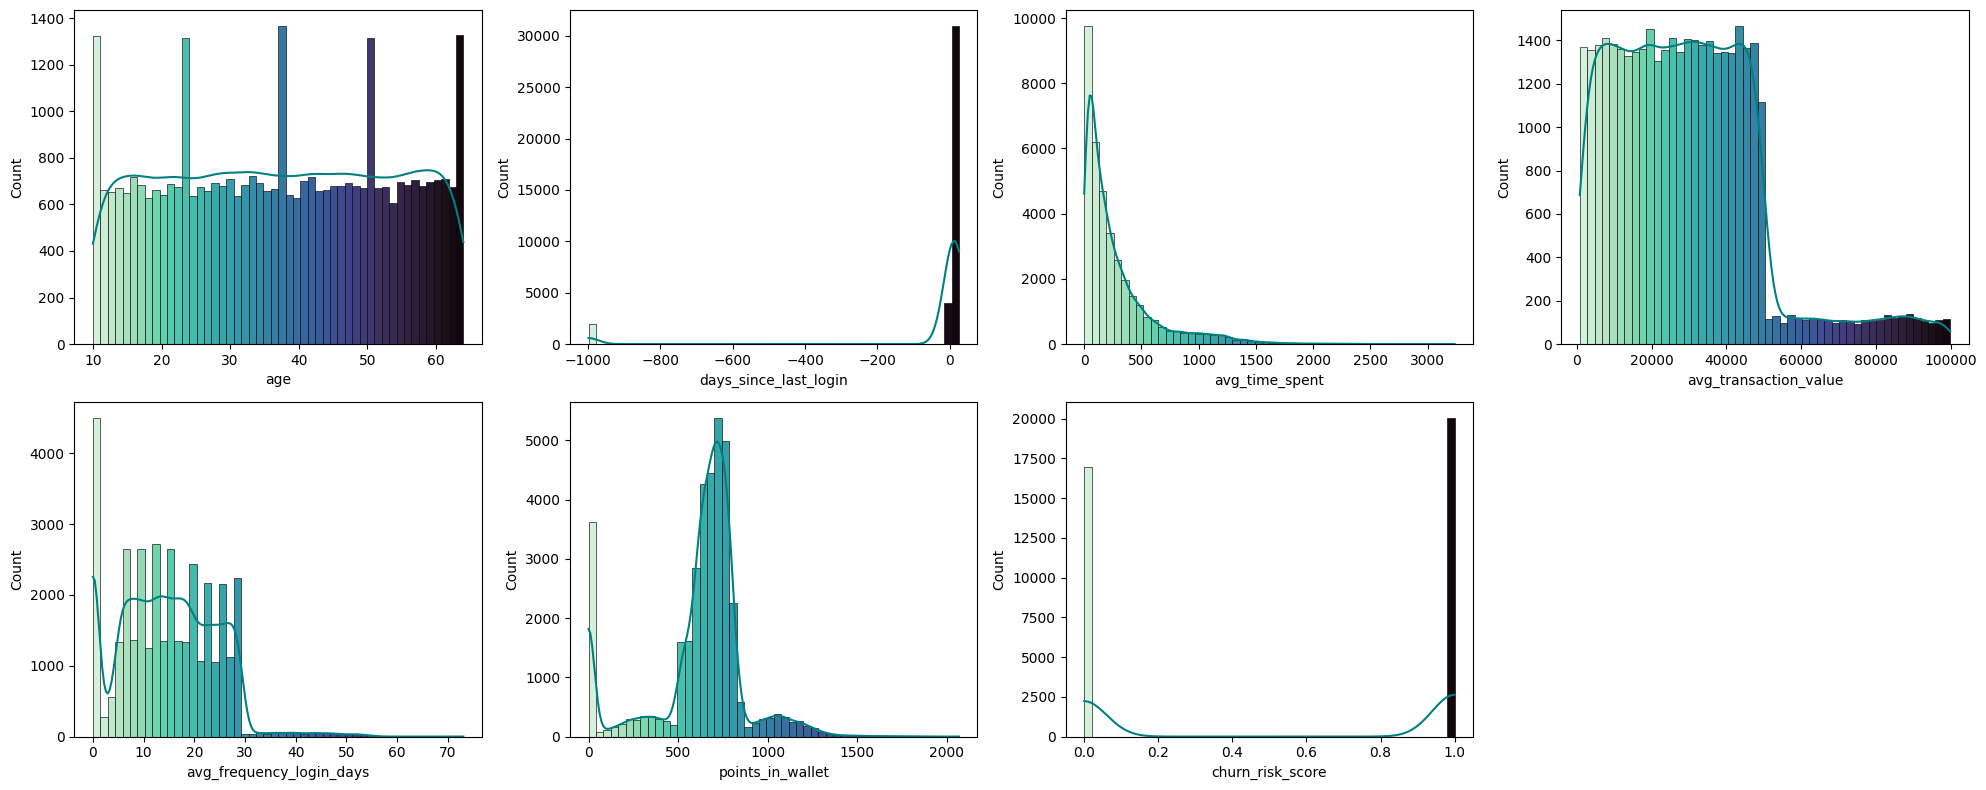

In [12]:
# check num distribution
plt.figure(figsize=(20, 8))

palette = sns.color_palette("mako_r", 50)

index = 1

for i in num_col:
    plt.subplot(2, 4, index)
    plot = sns.histplot(data=data, x=i, kde=True, bins=50, color="teal")

    for bin_, i in zip(plot.patches, palette):
        bin_.set_facecolor(i)

    index = index + 1

plt.tight_layout()

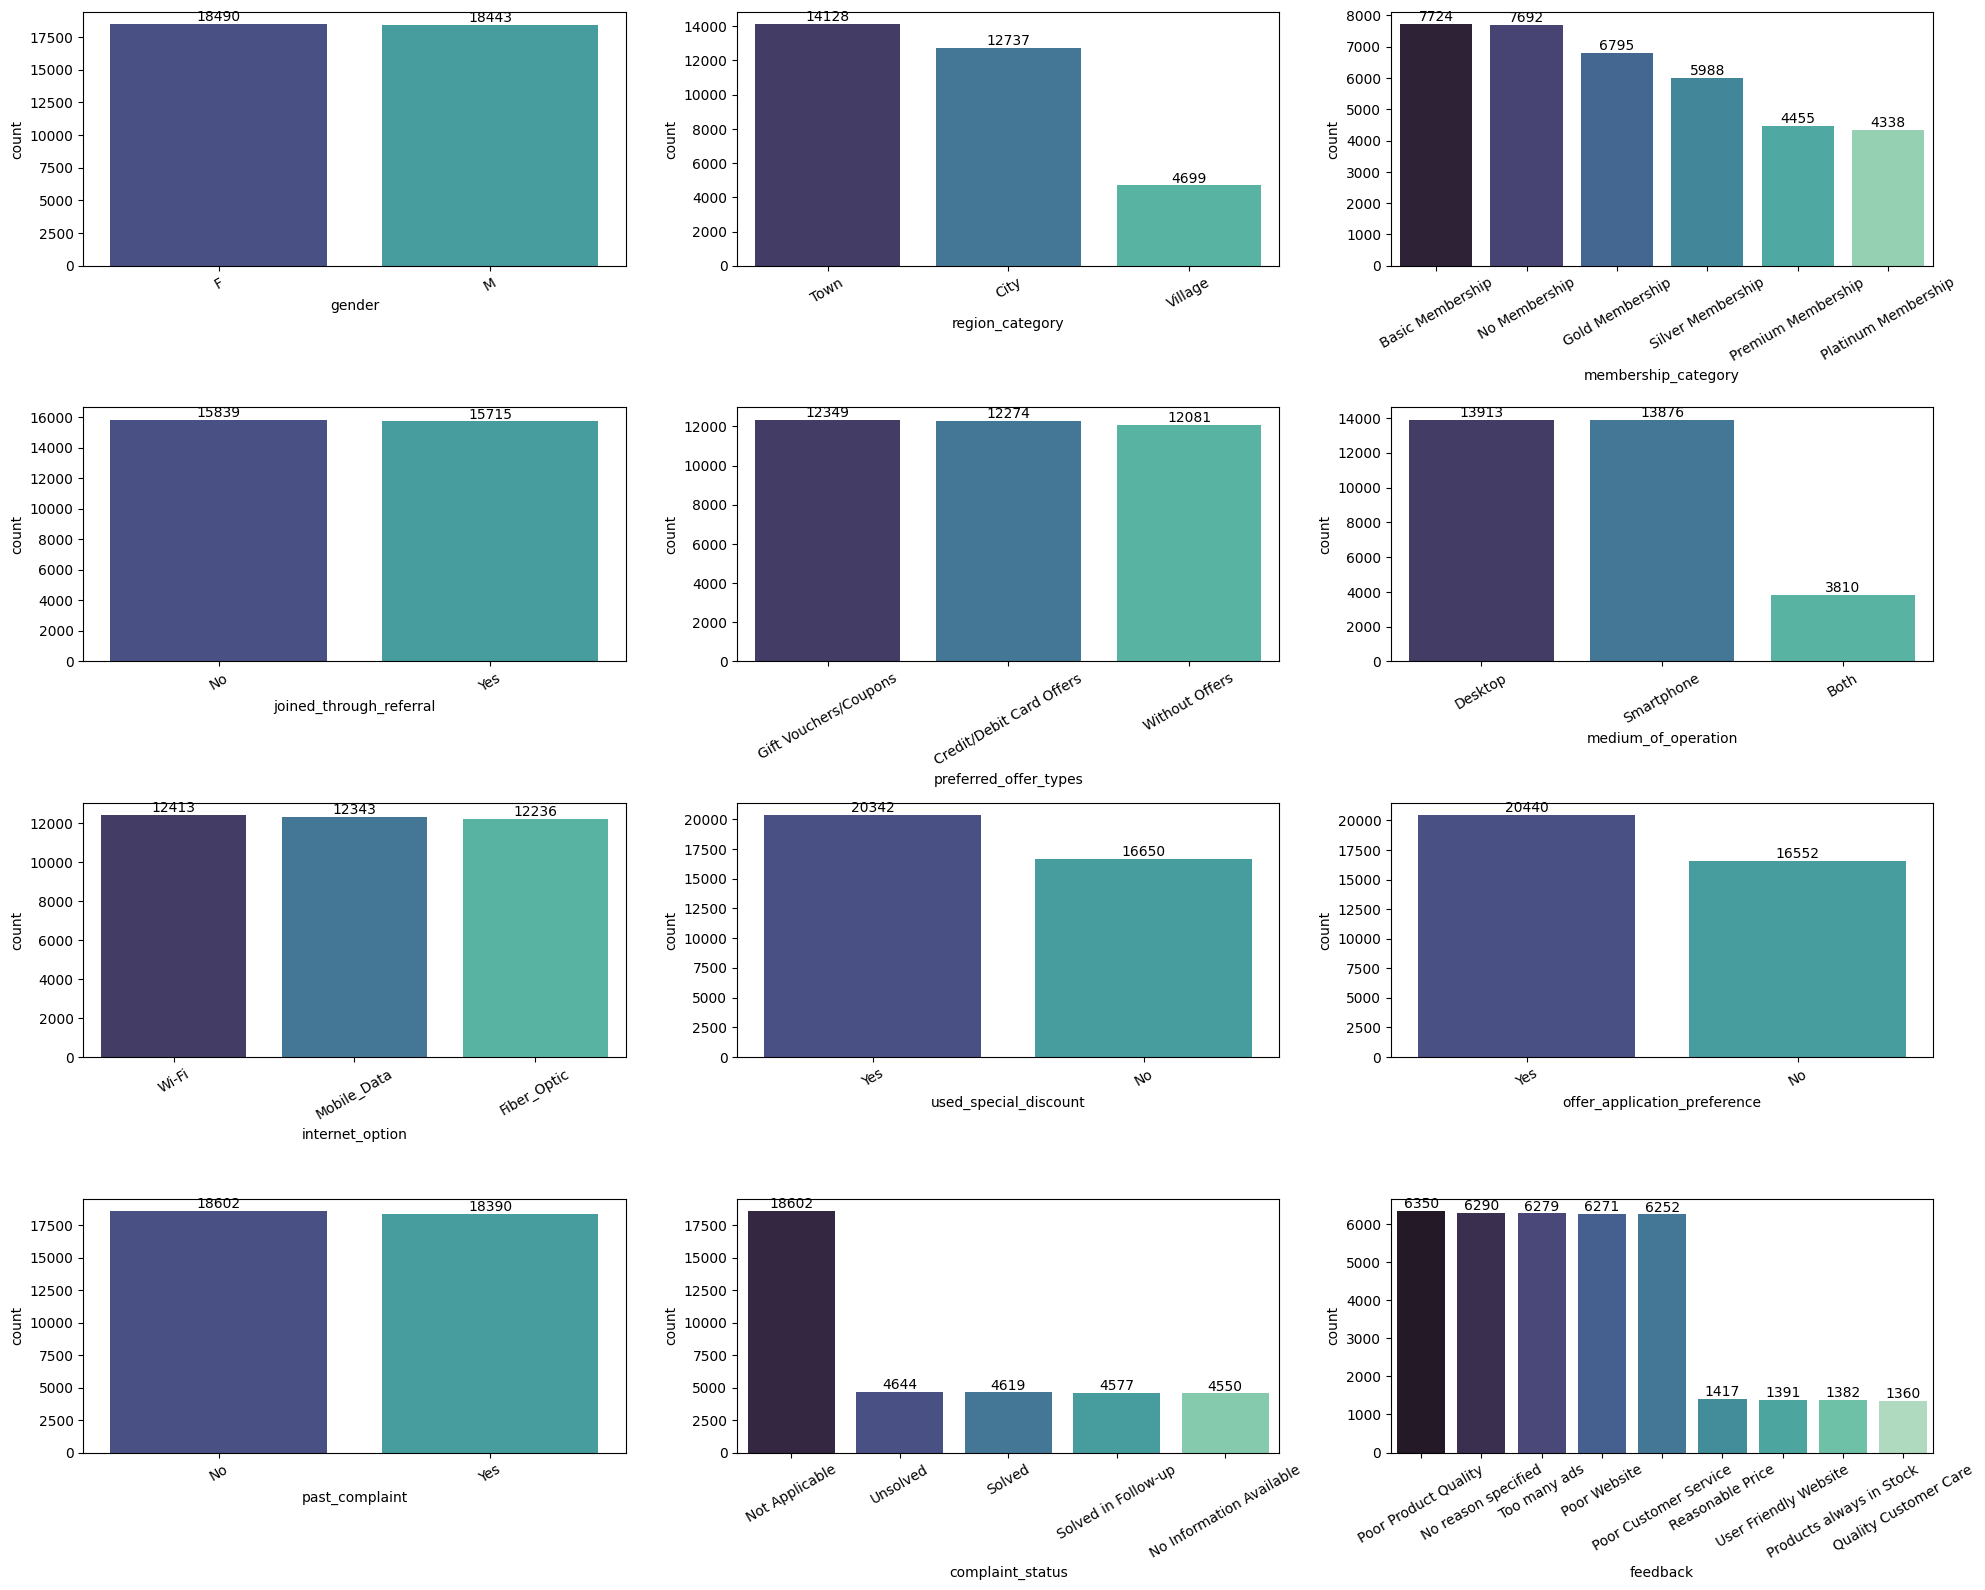

In [13]:
# check cat distribution
plt.figure(figsize=(20, 16))

palette = sns.color_palette("mako_r", 50)

index = 1

for i in cat_col:
    if i != "user_id" and i != "joining_date" and i != "last_visit_time":
        plt.subplot(4, 3, index)
        plot = sns.countplot(
            data=data, x=i, palette="mako", order=data[i].value_counts().index
        )
        plt.bar_label(
            container=plot.containerstf.keras.optimizers.Adam()0], labels=data[i].value_counts().values
        )
        plt.xticks(rotation=30)
    else:
        index = index - 1

    index = index + 1

plt.tight_layout()

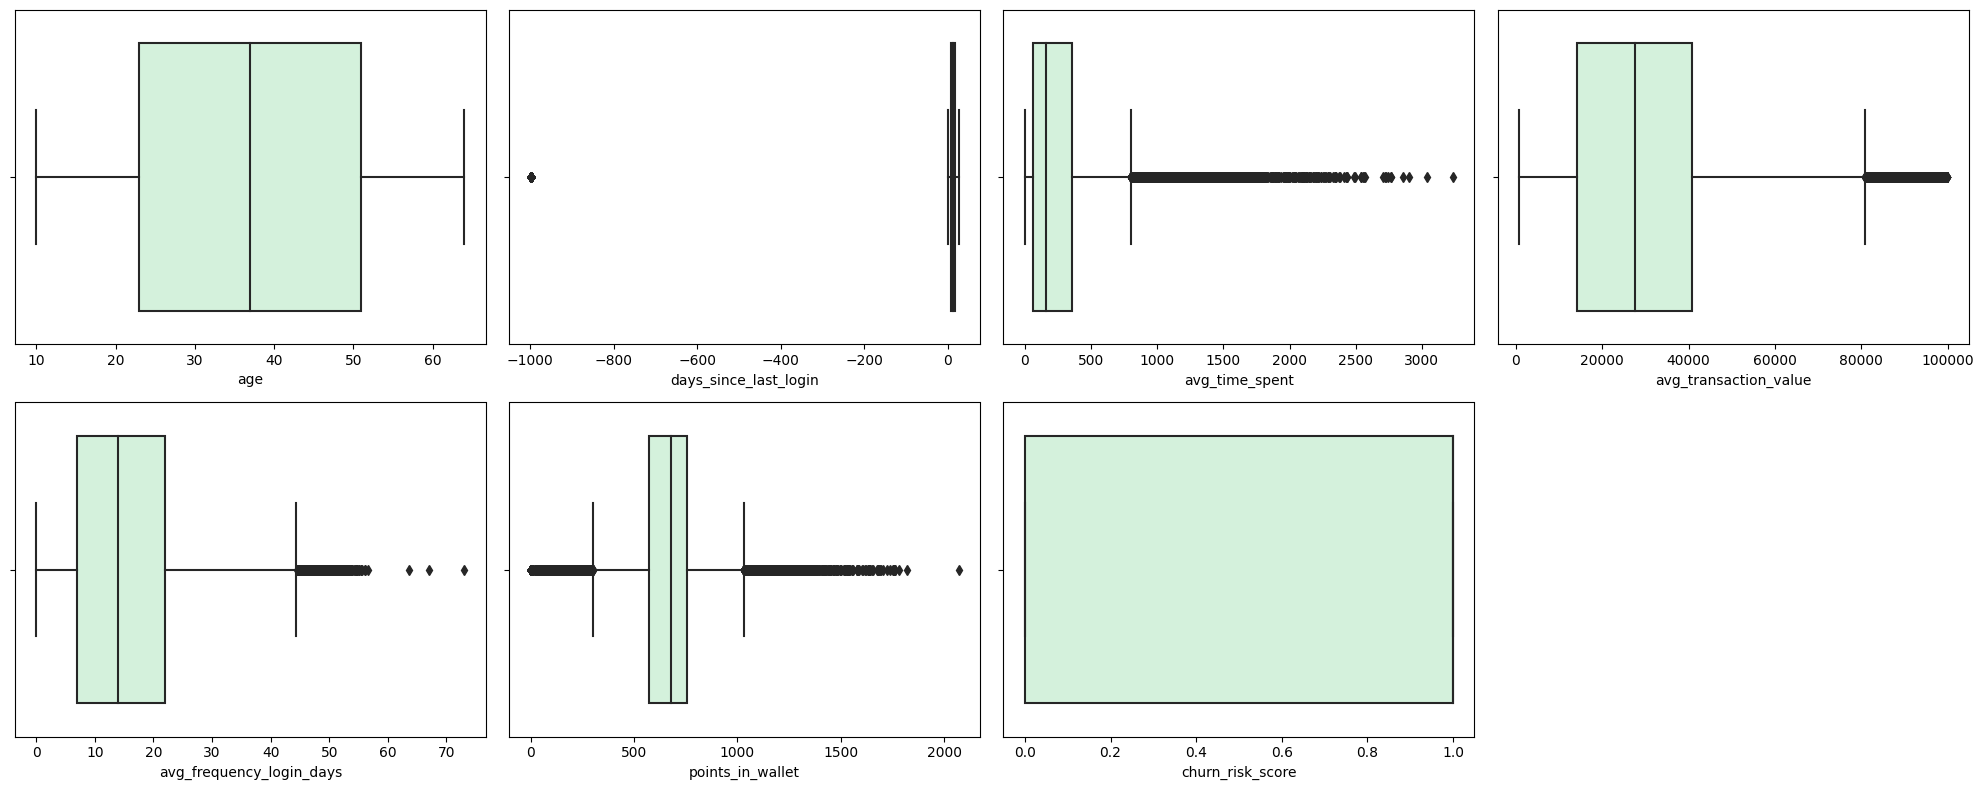

In [14]:
# check num distribution
plt.figure(figsize=(20, 8))

index = 1

for i in num_col:
    plt.subplot(2, 4, index)
    plot = sns.boxplot(data=data, x=i, color="teal")

    for bin_, i in zip(plot.patches, palette):
        bin_.set_facecolor(i)

    index = index + 1

plt.tight_layout()

In [15]:
# def cramers_v
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

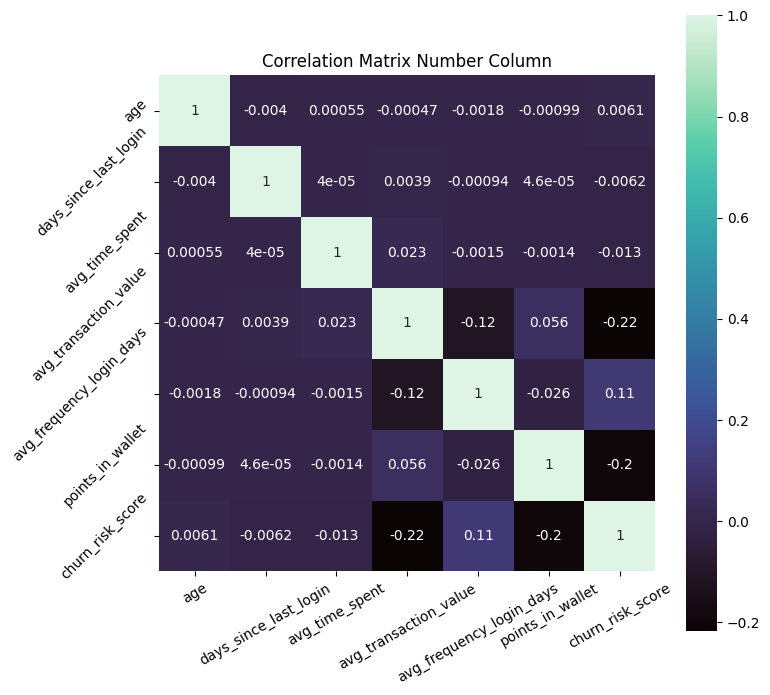

In [16]:
# check correlation

corr = data[num_col].corr(method="pearson")

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap="mako", square=True)
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.title("Correlation Matrix Number Column")

plt.show()

In [17]:
# correlation for categorical
print("Correlation Categorical Columns")
for i in cat_col:
    if i != "user_id":
        print(i, " :", round(cramers_v(data[i], data["churn_risk_score"]), 4))

Correlation Categorical Columns
gender  : 0.0
region_category  : 0.0223
membership_category  : 0.7859
joining_date  : 0.0
joined_through_referral  : 0.0355
preferred_offer_types  : 0.0434
medium_of_operation  : 0.0218
internet_option  : 0.0025
last_visit_time  : 0.0604
used_special_discount  : 0.0092
offer_application_preference  : 0.0179
past_complaint  : 0.0072
complaint_status  : 0.0054
feedback  : 0.4561


## 03 - Feature Engineering


### Feature Selection


In [18]:
data.drop(
    columns=["user_id", "gender", "joining_date", "last_visit_time"], inplace=True
)

In [19]:
data.shape

(36992, 18)

### Handling High Cardinality


In [20]:
for i in cat_col:
    if (
        i != "user_id"
        and i != "gender"
        and i != "joining_date"
        and i != "last_visit_time"
    ):
        print(i)
        print(data[i].unique())
        print("")

region_category
[nan 'City' 'Village' 'Town']

membership_category
['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']

joined_through_referral
['Yes' nan 'No']

preferred_offer_types
['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan]

medium_of_operation
[nan 'Desktop' 'Smartphone' 'Both']

internet_option
['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']

used_special_discount
['Yes' 'No']

offer_application_preference
['Yes' 'No']

past_complaint
['Yes' 'No']

complaint_status
['No Information Available' 'Not Applicable' 'Unsolved' 'Solved'
 'Solved in Follow-up']

feedback
['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']



In [21]:
feedback = []

for i in data["feedback"]:
    if i == "Poor Website":
        value = "Negative"
    elif i == "Poor Customer Service":
        value = "Negative"
    elif i == "Too many ads":
        value = "Negative"
    elif i == "Poor Product Quality":
        value = "Negative"
    elif i == "No reason specified":
        value = "Neutral"
    elif i == "Products always in Stock":
        value = "Positive"
    elif i == "Reasonable Price":
        value = "Positive"
    elif i == "Quality Customer Care":
        value = "Positive"
    elif i == "User Friendly Website":
        value = "Positive"
    feedback.append(value)

data["feedback"] = feedback

In [22]:
data["feedback"].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

### Split Feature and Target


In [23]:
X = data.drop(columns="churn_risk_score")
y = data["churn_risk_score"]

X.shape, y.shape

((36992, 17), (36992,))

### Split Into Train, Val and Test


In [24]:
# train test val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=5
)

print("Train Size :", X_train.shape)
print("Val Size :", X_val.shape)
print("Test Size :", X_test.shape)

Train Size : (26633, 17)
Val Size : (6659, 17)
Test Size : (3700, 17)


### Handle Outliers


In [25]:
# Create the capper

winsoriser = Winsorizer(
    capping_method="quantiles",
    tail="both",  # cap left, right or both tails
    fold=0.05,
    variables=[
        "avg_time_spent",
        "avg_transaction_value",
        "avg_frequency_login_days",
        "points_in_wallet",
    ],
)

### Handle Missing Values


In [26]:
X_train[X_train["region_category"].isnull()].sample(5)

,age,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
14079,34,NaN,Gold Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,16,225.24,27891.95,24.0,744.530000,No,Yes,No,Not Applicable,Negative
29504,57,NaN,Silver Membership,Yes,Without Offers,Desktop,Mobile_Data,19,1408.78,25846.93,22.0,0.000000,Yes,No,No,Not Applicable,Negative
17480,47,NaN,No Membership,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,12,91.39,1104.27,14.0,0.000000,No,Yes,No,Not Applicable,Negative
28223,28,NaN,Premium Membership,Yes,Credit/Debit Card Offers,NaN,Wi-Fi,14,395.77,42740.44,0.0,230.036948,No,Yes,No,Not Applicable,Positive
4096,17,NaN,No Membership,Yes,Without Offers,Smartphone,Wi-Fi,12,66.10,7607.73,9.0,694.840000,Yes,No,Yes,No Information Available,Negative


MCAR, assume it's mode


In [27]:
X_train["region_category"].mode()

0    Town
Name: region_category, dtype: object

In [28]:
X_train["region_category"].fillna("Town", inplace=True)
X_val["region_category"].fillna("Town", inplace=True)
X_test["region_category"].fillna("Town", inplace=True)

In [29]:
X_train[X_train["joined_through_referral"].isnull()].sample(5)

,age,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
35094,45,Village,Platinum Membership,NaN,Without Offers,Smartphone,Fiber_Optic,7,156.93,9081.72,12.0,0.000000,Yes,No,Yes,No Information Available,Negative
17048,21,Town,Silver Membership,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,18,108.65,7603.75,13.0,636.140000,Yes,No,No,Not Applicable,Neutral
12172,36,Town,Basic Membership,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,16,472.42,21631.24,22.0,688.000000,Yes,No,Yes,Solved,Neutral
17702,32,Town,Basic Membership,NaN,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,9,105.67,7560.71,5.0,1052.667849,Yes,No,No,Not Applicable,Negative
30232,40,City,Basic Membership,NaN,Without Offers,Desktop,Fiber_Optic,17,329.61,27141.39,7.0,505.460000,Yes,Yes,No,Not Applicable,Neutral


MCAR, fillna with mode


In [30]:
X_train["joined_through_referral"].mode()

0    No
Name: joined_through_referral, dtype: object

In [31]:
X_train["joined_through_referral"].fillna("No", inplace=True)
X_val["joined_through_referral"].fillna("No", inplace=True)
X_test["joined_through_referral"].fillna("No", inplace=True)

In [32]:
X_train[X_train["preferred_offer_types"].isnull()].sample(5)

,age,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
27393,43,Town,No Membership,No,NaN,Desktop,Fiber_Optic,13,235.42,18777.08,21.000000,434.069028,Yes,Yes,No,Not Applicable,Negative
23576,53,Town,Gold Membership,No,NaN,Desktop,Mobile_Data,12,84.43,30761.37,1.760559,712.280000,No,Yes,No,Not Applicable,Negative
5169,60,Town,Gold Membership,No,NaN,Smartphone,Fiber_Optic,9,54.08,19078.81,17.000000,752.880000,Yes,No,Yes,Solved,Negative
21756,34,Town,No Membership,No,NaN,Desktop,Mobile_Data,15,382.75,42892.96,0.000000,394.175251,No,Yes,Yes,No Information Available,Negative
29402,21,Town,Platinum Membership,No,NaN,Smartphone,Wi-Fi,6,44.55,1788.93,6.000000,726.240000,Yes,No,Yes,Unsolved,Negative


MCAR, Assume no offer preferred


In [33]:
X_train["preferred_offer_types"].fillna("None", inplace=True)
X_val["preferred_offer_types"].fillna("None", inplace=True)
X_test["preferred_offer_types"].fillna("None", inplace=True)

In [34]:
X_train[X_train["medium_of_operation"].isnull()].sample(5)

,age,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
31842,51,Town,Platinum Membership,Yes,Gift Vouchers/Coupons,NaN,Wi-Fi,13,544.75,25571.88,0.000000,248.23989,Yes,No,No,Not Applicable,Negative
24708,15,City,Basic Membership,No,Without Offers,NaN,Fiber_Optic,14,465.48,36183.89,32.326745,603.73000,No,Yes,Yes,Unsolved,Negative
14940,32,City,Silver Membership,No,Without Offers,NaN,Fiber_Optic,3,128.32,23324.03,10.000000,769.93000,No,Yes,No,Not Applicable,Negative
8493,51,Village,No Membership,Yes,Without Offers,NaN,Wi-Fi,16,164.30,11658.10,5.000000,569.25000,No,Yes,No,Not Applicable,Negative
26314,28,Village,Silver Membership,No,Gift Vouchers/Coupons,NaN,Mobile_Data,7,394.80,35724.29,7.000000,601.13000,No,Yes,Yes,Unsolved,Negative


MNAR, ada fiber_optic berarti bukan hp


In [35]:
X_train["medium_of_operation"].value_counts()

medium_of_operation
Smartphone    10010
Desktop        9994
Both           2725
Name: count, dtype: int64

In [36]:
X_train["medium_of_operation"].fillna("Both", inplace=True)
X_val["medium_of_operation"].fillna("Both", inplace=True)
X_test["medium_of_operation"].fillna("Both", inplace=True)

In [37]:
X_train.isnull().sum()

age                             0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

### Feature Scaling & Encoding


In [38]:
# split ordinal and nominal category
num_col = X.select_dtypes(include=np.number).columns.tolist()
ord_col = ["membership_category", "complaint_status", "feedback"]
nom_col = X.drop(columns=num_col + ord_col).columns.tolist()

In [39]:
scaler_pipeline = Pipeline([("winsorizer", winsoriser), ("scaler", RobustScaler())])

In [40]:
nominal_pipeline = Pipeline(
    [
        (
            "onehot_encoder",
            OneHotEncoder(handle_unknown="ignore"),
        )  # encode using onehot encoder
    ]
)

In [41]:
ordinal_order = [
    [
        "No Membership",
        "Basic Membership",
        "Premium Membership",
        "Silver Membership",
        "Gold Membership",
        "Platinum Membership",
    ],
    [
        "Not Applicable",
        "Unsolved",
        "No Information Available",
        "Solved in Follow-up",
        "Solved",
    ],
    ["Negative", "Neutral", "Positive"],
]

In [42]:
ordinal_pipeline = Pipeline(
    [
        (
            "ordinal_encoder",
            OrdinalEncoder(
                categories=ordinal_order,
                handle_unknown="use_encoded_value",
                unknown_value=-1,
            ),
        )  # encode using onehot encoder
    ]
)

### Column Transformers


In [43]:
col_transformers = ColumnTransformer(
    [
        ("pipe_num", scaler_pipeline, num_col),
        ("pipe_ord", ordinal_pipeline, ord_col),
        ("pipe_nom", nominal_pipeline, nom_col),
    ]
)

In [44]:
X_train = col_transformers.fit_transform(X_train)
X_val = col_transformers.transform(X_val)
X_test = col_transformers.transform(X_test)

In [45]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.500,-0.333028,0.391274,0.357143,0.559812,5.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.925926,0.250,-0.427457,-0.226685,0.857143,-0.137940,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.777778,-0.750,-0.094734,-0.179631,-1.000000,-0.155176,4.0,3.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.333333,0.875,0.519001,-0.568519,0.214286,-0.464826,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,-0.703704,-1.000,2.948620,-0.436330,-1.000000,0.136968,4.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26628,-0.666667,-0.250,-0.211557,-0.026385,0.285714,-0.502215,1.0,4.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
26629,0.407407,0.125,0.450869,-0.139498,0.000000,0.300086,3.0,3.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
26630,0.444444,-0.875,2.447170,0.764791,0.428571,0.098012,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
26631,-0.740741,-0.125,-0.419551,-0.567680,0.642857,0.854292,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## 04 - Model Definition


### Pipeline


In [46]:
train_pipe = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .batch(32)
    .shuffle(100)
    .repeat(2)
    .prefetch(tf.data.AUTOTUNE)
)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

### Sequential


In [47]:
# clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [48]:
early_stopping = EarlyStopping(
    monitor="accuracy", patience=5, restore_best_weights=True
)

In [49]:
model_sequential = Sequential()

model_sequential.add(
    Dense(
        16,
        activation="relu",
        kernel_initializer=tf.keras.initializers.HeNormal(seed),
        input_shape=(30,),
    )
)  # Hidden Layer 1

model_sequential.add(
    Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed))
)  # Hidden Layer 1


model_sequential.add(
    Dense(
        1,
        activation="sigmoid",
        kernel_initializer=tf.keras.initializers.GlorotNormal(seed),
    )
)  # Output Layer

# compile
model_sequential.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


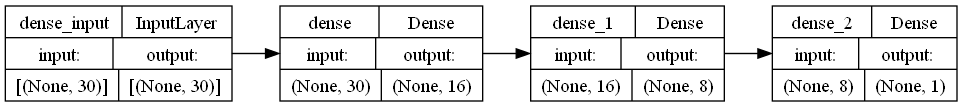

In [50]:
# plot
tf.keras.utils.plot_model(
    model_sequential, show_shapes=True, rankdir="LR", show_layer_names=True
)

In [51]:
history_seq = model_sequential.fit(
    train_pipe, epochs=20, validation_data=val_pipe, callbacks=[early_stopping]
)
history_seq_df = pd.DataFrame(history_seq.history)

history_seq_df.tail()

Epoch 1/20
 394/1666 [======>.......................] - ETA: 1s - loss: 0.5828 - accuracy: 0.7170

1666/1666 [==============================] - 2s 1ms/step - loss: 0.4470 - accuracy: 0.7730 - val_loss: 0.3816 - val_accuracy: 0.8042
Epoch 2/20
1666/1666 [==============================] - 2s 1ms/step - loss: 0.3450 - accuracy: 0.8411 - val_loss: 0.3073 - val_accuracy: 0.8808
Epoch 3/20
1666/1666 [==============================] - 2s 921us/step - loss: 0.2782 - accuracy: 0.8933 - val_loss: 0.2550 - val_accuracy: 0.9042
Epoch 4/20
1666/1666 [==============================] - 2s 898us/step - loss: 0.2419 - accuracy: 0.9055 - val_loss: 0.2356 - val_accuracy: 0.9079
Epoch 5/20
1666/1666 [==============================] - 2s 911us/step - loss: 0.2274 - accuracy: 0.9090 - val_loss: 0.2244 - val_accuracy: 0.9067
Epoch 6/20
1666/1666 [==============================] - 2s 902us/step - loss: 0.2163 - accuracy: 0.9130 - val_loss: 0.2140 - val_accuracy: 0.9159
Epoch 7/20
1666/1666 [==============================] - 2s 901us/step - loss: 0.2082 - accuracy: 0.9165 - val_loss: 0.2080 - val_accuracy: 

,loss,accuracy,val_loss,val_accuracy
15,0.182400,0.923103,0.192355,0.918907
16,0.182242,0.921883,0.188272,0.919357
17,0.180265,0.922896,0.185402,0.920859
18,0.179621,0.922502,0.189438,0.921760
19,0.178700,0.924361,0.183201,0.921460


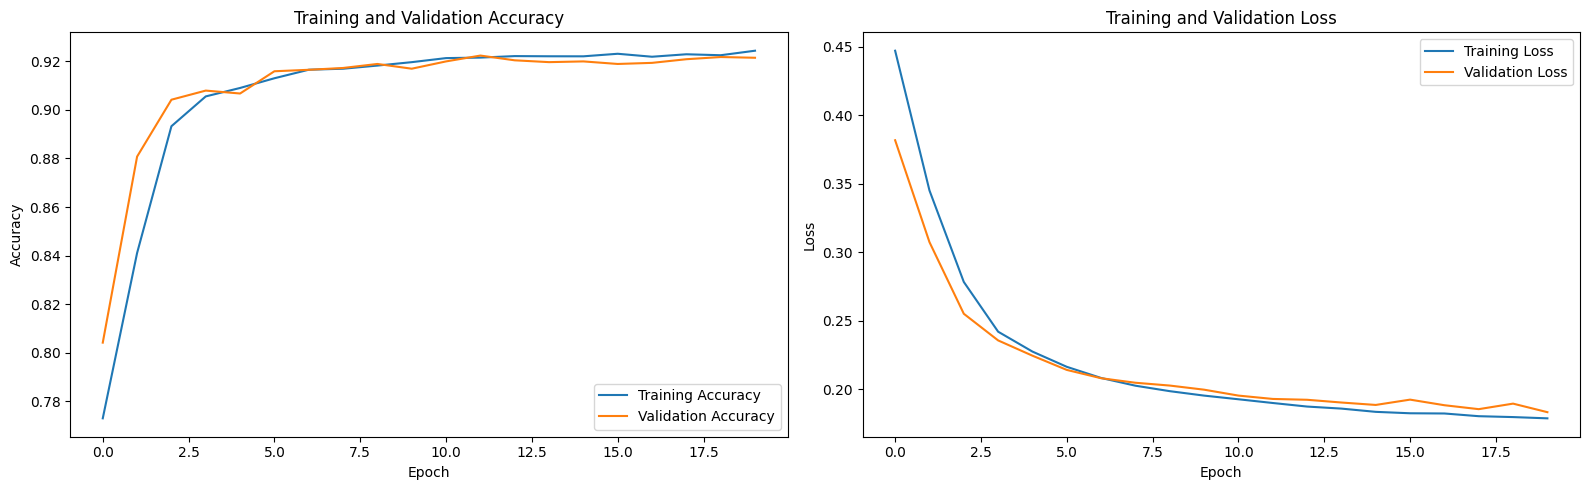

In [52]:
plt.figure(figsize=(16, 5))

# First subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history_seq_df["accuracy"], label="Training Accuracy")
plt.plot(history_seq_df["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Second subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history_seq_df["loss"], label="Training Loss")
plt.plot(history_seq_df["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

### Functional


In [53]:
# clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [54]:
input_layer = Input(shape=(30,))
hidden_layer_1 = Dense(
    16, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed)
)(input_layer)

hidden_layer_2 = Dense(
    8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed)
)(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])

output_layer = Dense(
    1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal(seed)
)(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# compile

model_functional.compile(
    loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics="accuracy"
)

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   496       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 8)                    136       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

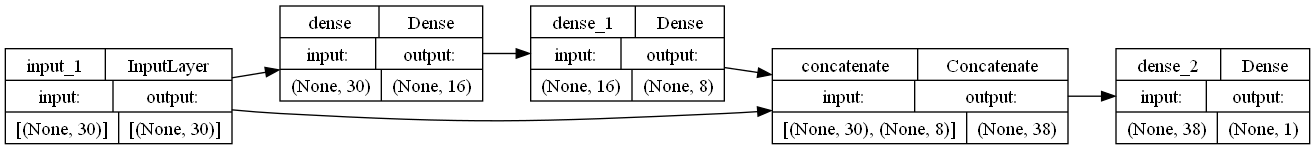

In [55]:
# plot
tf.keras.utils.plot_model(
    model_functional, show_shapes=True, rankdir="LR", show_layer_names=True
)

In [56]:
history_func = model_functional.fit(
    train_pipe, epochs=20, validation_data=val_pipe, batch_size=10
)

history_func_df = pd.DataFrame(history_func.history)

history_func_df.tail()

Epoch 1/20


1666/1666 [==============================] - 2s 1ms/step - loss: 0.4229 - accuracy: 0.7788 - val_loss: 0.3647 - val_accuracy: 0.8061
Epoch 2/20
1666/1666 [==============================] - 2s 936us/step - loss: 0.3471 - accuracy: 0.8332 - val_loss: 0.3478 - val_accuracy: 0.8381
Epoch 3/20
1666/1666 [==============================] - 2s 1ms/step - loss: 0.3147 - accuracy: 0.8583 - val_loss: 0.3062 - val_accuracy: 0.8742
Epoch 4/20
1666/1666 [==============================] - 2s 908us/step - loss: 0.2862 - accuracy: 0.8857 - val_loss: 0.2781 - val_accuracy: 0.8941
Epoch 5/20
1666/1666 [==============================] - 2s 900us/step - loss: 0.2712 - accuracy: 0.8962 - val_loss: 0.2670 - val_accuracy: 0.9066
Epoch 6/20
1666/1666 [==============================] - 2s 902us/step - loss: 0.2626 - accuracy: 0.9034 - val_loss: 0.2704 - val_accuracy: 0.9075
Epoch 7/20
1666/1666 [==============================] - 1s 897us/step - loss: 0.2577 - accuracy: 0.9048 - val_loss: 0.2569 - val_accuracy: 

,loss,accuracy,val_loss,val_accuracy
15,0.179978,0.922070,0.183111,0.922961
16,0.177127,0.922784,0.180936,0.925364
17,0.176243,0.923047,0.193857,0.920709
18,0.174204,0.923798,0.181920,0.925364
19,0.173061,0.924229,0.185462,0.920709


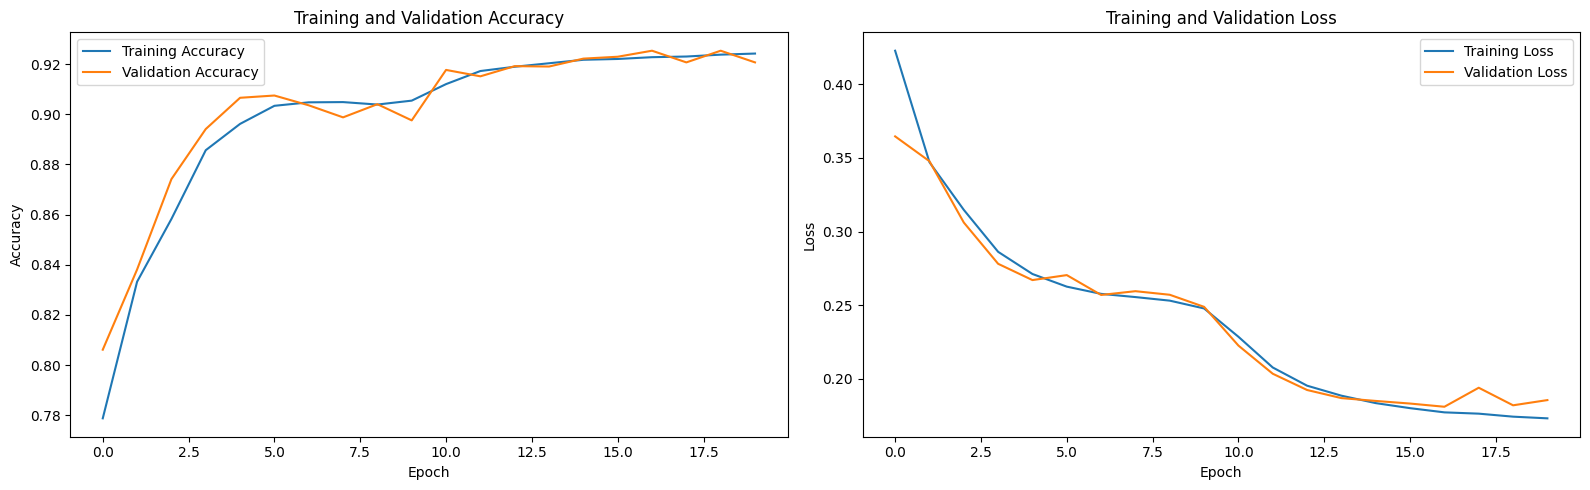

In [57]:
plt.figure(figsize=(16, 5))

# First subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history_func_df["accuracy"], label="Training Accuracy")
plt.plot(history_func_df["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Second subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history_func_df["loss"], label="Training Loss")
plt.plot(history_func_df["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

## 05 - Model Evaluation


### Sequential


In [58]:
# predict test
y_pred_seq = model_sequential.predict(X_test)

y_pred_seq = np.where(y_pred_seq > 0.5, 1, 0)

116/116 [==============================] - 0s 580us/step


In [59]:
print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1672
           1       0.93      0.93      0.93      2028

    accuracy                           0.93      3700
   macro avg       0.93      0.93      0.93      3700
weighted avg       0.93      0.93      0.93      3700



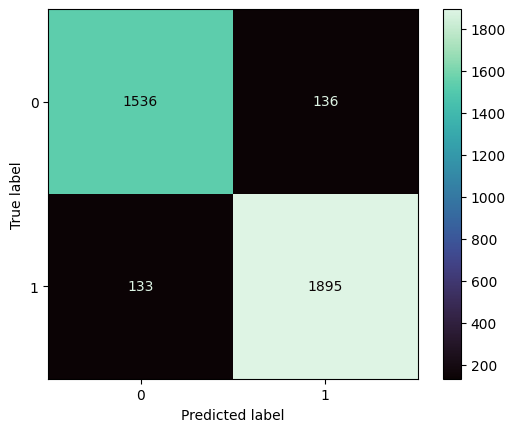

In [60]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_seq)

ConfusionMatrixDisplay(conf_matrix).plot(cmap="mako")

### Functional


In [61]:
# predict test
y_pred_func = model_functional.predict(X_test)

y_pred_func = np.where(y_pred_func > 0.5, 1, 0)

116/116 [==============================] - 0s 587us/step


In [62]:
print(classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1672
           1       0.94      0.93      0.93      2028

    accuracy                           0.93      3700
   macro avg       0.93      0.93      0.93      3700
weighted avg       0.93      0.93      0.93      3700



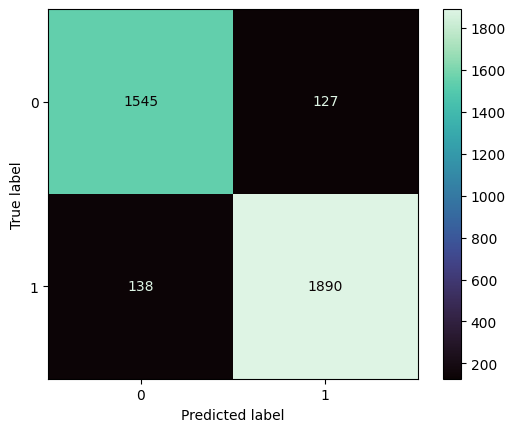

In [63]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_func)

ConfusionMatrixDisplay(conf_matrix).plot(cmap="mako")

## 06 - Model Improvement


### Sequential - Improved


In [64]:
# clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [65]:
reduce_lr = ReduceLROnPlateau(monitor="accuracy", factor=0.2, patience=5, min_lr=0)

early_stopping = EarlyStopping(
    monitor="accuracy", patience=10, restore_best_weights=True
)

In [67]:
model_sequential_improve = Sequential()

model_sequential_improve.add(
    Dense(
        16,
        activation="relu",
        kernel_initializer=tf.keras.initializers.HeNormal(seed),
        input_shape=(30,),
    )
)  # Hidden Layer 1

model_sequential_improve.add(
    Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed))
)  # Hidden Layer 2

model_sequential_improve.add(
    Dense(4, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed))
)  # Hidden Layer 3

model_sequential_improve.add(
    Dense(2, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed))
)  # Hidden Layer 3

model_sequential_improve.add(
    Dense(
        1,
        activation="sigmoid",
        kernel_initializer=tf.keras.initializers.GlorotNormal(seed),
    )
)  # Output Layer

# compile
model_sequential_improve.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model_sequential_improve.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                496       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 681 (2.66 KB)
Trainable params: 681 (2.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


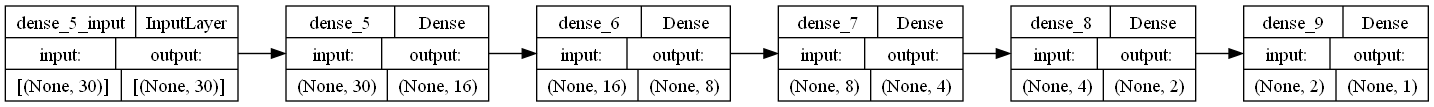

In [68]:
# plot
tf.keras.utils.plot_model(
    model_sequential_improve, show_shapes=True, rankdir="LR", show_layer_names=True
)

In [69]:
history_seq_improve = model_sequential_improve.fit(
    train_pipe,
    epochs=50,
    validation_data=val_pipe,
    callbacks=[early_stopping, reduce_lr],
)
history_seq_improve_df = pd.DataFrame(history_seq_improve.history)

history_seq_improve_df.tail()

Epoch 1/50


1666/1666 [==============================] - 2s 1ms/step - loss: 0.4284 - accuracy: 0.7813 - val_loss: 0.3499 - val_accuracy: 0.8330 - lr: 0.0010
Epoch 2/50
1666/1666 [==============================] - 2s 1ms/step - loss: 0.2848 - accuracy: 0.8796 - val_loss: 0.2477 - val_accuracy: 0.8881 - lr: 0.0010
Epoch 3/50
1666/1666 [==============================] - 2s 979us/step - loss: 0.2364 - accuracy: 0.8987 - val_loss: 0.2213 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 4/50
1666/1666 [==============================] - 2s 1ms/step - loss: 0.2201 - accuracy: 0.9055 - val_loss: 0.2111 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 5/50
1666/1666 [==============================] - 2s 918us/step - loss: 0.2114 - accuracy: 0.9075 - val_loss: 0.2074 - val_accuracy: 0.9081 - lr: 0.0010
Epoch 6/50
1666/1666 [==============================] - 2s 980us/step - loss: 0.2017 - accuracy: 0.9118 - val_loss: 0.1904 - val_accuracy: 0.9153 - lr: 0.0010
Epoch 7/50
1666/1666 [==============================] - 2s 943u

,loss,accuracy,val_loss,val_accuracy,lr
45,0.163959,0.930800,0.175065,0.924013,0.001
46,0.163733,0.931213,0.176006,0.924463,0.001
47,0.163767,0.930256,0.178483,0.924764,0.001
48,0.163792,0.930387,0.176730,0.925064,0.001
49,0.163633,0.930462,0.177036,0.923412,0.001


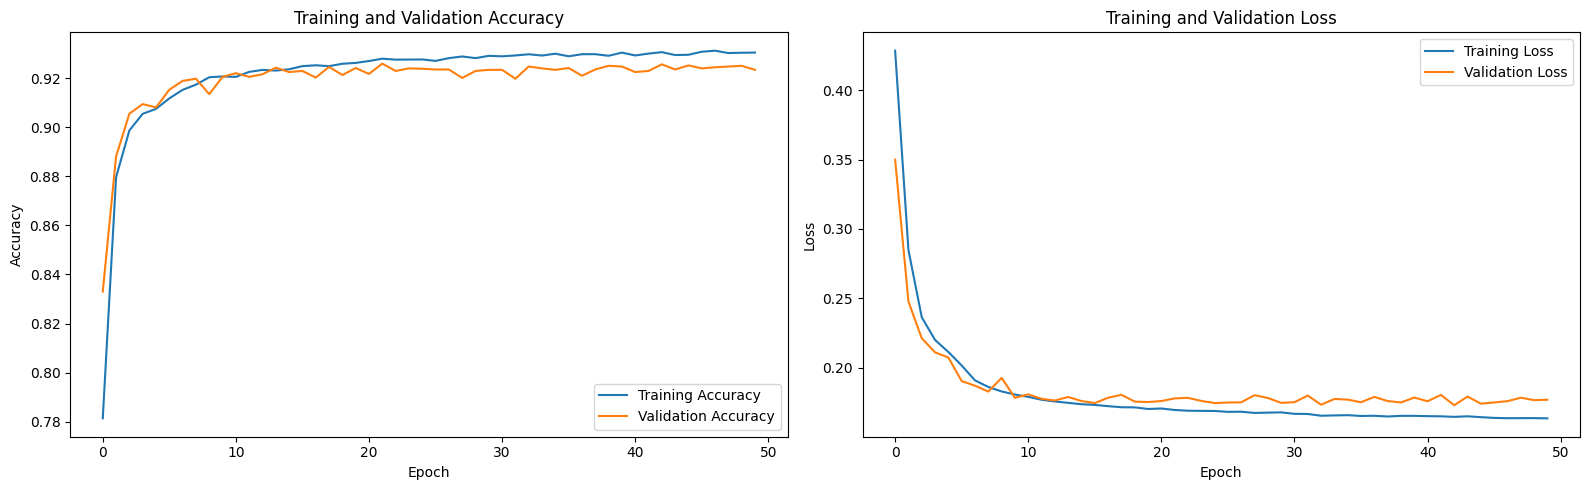

In [70]:
plt.figure(figsize=(16, 5))

# First subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history_seq_improve_df["accuracy"], label="Training Accuracy")
plt.plot(history_seq_improve_df["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Second subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history_seq_improve_df["loss"], label="Training Loss")
plt.plot(history_seq_improve_df["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

In [71]:
# predict test
y_pred_seq_improve = model_sequential_improve.predict(X_test)

y_pred_seq_improve = np.where(y_pred_seq_improve > 0.65, 1, 0)

116/116 [==============================] - 0s 566us/step


### Functional - Improved


In [72]:
# clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [73]:
input_layer = Input(shape=(30,))
hidden_layer_1 = Dense(
    16, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed)
)(input_layer)

hidden_layer_2 = Dense(
    8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed)
)(hidden_layer_1)

hidden_layer_3 = concatenate([hidden_layer_1, hidden_layer_2])

hidden_layer_4 = Dense(
    8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed)
)(hidden_layer_3)

concat_layer = concatenate([hidden_layer_3, hidden_layer_4])

output_layer = Dense(
    1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal(seed)
)(concat_layer)

model_functional_improved = Model(inputs=input_layer, outputs=output_layer)

# compile

model_functional_improved.compile(
    loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics="accuracy"
)

model_functional_improved.summary()

Model: "model"


__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   496       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 8)                    136       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 24)                   0         ['dense[0][0]',               
                                                                     'dense_1[0][0]']             
          

In [74]:
# predict test
y_pred_seq_improve = model_sequential_improve.predict(X_test)

y_pred_seq_improve = np.where(y_pred_seq_improve > 0.65, 1, 0)

116/116 [==============================] - 0s 580us/step


In [75]:
print(classification_report(y_test, y_pred_seq_improve))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1672
           1       0.96      0.92      0.94      2028

    accuracy                           0.93      3700
   macro avg       0.93      0.94      0.93      3700
weighted avg       0.94      0.93      0.93      3700



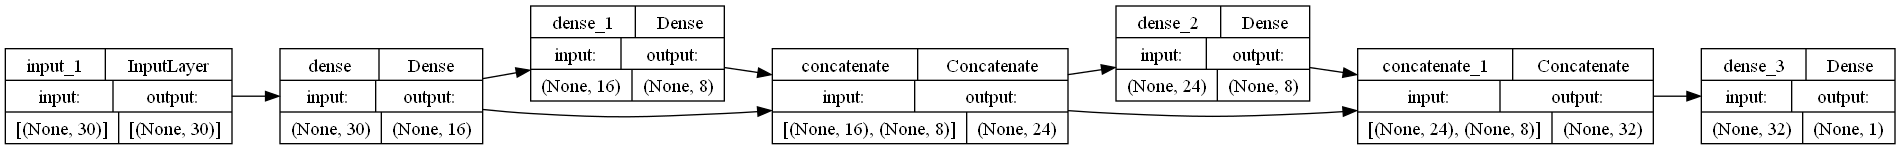

In [76]:
# plot
tf.keras.utils.plot_model(
    model_functional_improved, show_shapes=True, rankdir="LR", show_layer_names=True
)

In [77]:
history_func_improved = model_functional_improved.fit(
    train_pipe,
    epochs=50,
    validation_data=val_pipe,
    batch_size=10,
    callbacks=[early_stopping, reduce_lr],
)

history_func_improved_df = pd.DataFrame(history_func.history)

history_func_improved_df.tail()

Epoch 1/50


1666/1666 [==============================] - 2s 1ms/step - loss: 0.4265 - accuracy: 0.7950 - val_loss: 0.3568 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 2/50
1666/1666 [==============================] - 2s 1ms/step - loss: 0.3136 - accuracy: 0.8629 - val_loss: 0.2738 - val_accuracy: 0.8940 - lr: 0.0010
Epoch 3/50
1666/1666 [==============================] - 2s 952us/step - loss: 0.2412 - accuracy: 0.9031 - val_loss: 0.2209 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 4/50
1666/1666 [==============================] - 2s 1ms/step - loss: 0.2046 - accuracy: 0.9145 - val_loss: 0.1964 - val_accuracy: 0.9171 - lr: 0.0010
Epoch 5/50
1666/1666 [==============================] - 2s 943us/step - loss: 0.1936 - accuracy: 0.9168 - val_loss: 0.1867 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 6/50
1666/1666 [==============================] - 2s 993us/step - loss: 0.1880 - accuracy: 0.9182 - val_loss: 0.1883 - val_accuracy: 0.9213 - lr: 0.0010
Epoch 7/50
1666/1666 [==============================] - 2s 1ms/

,loss,accuracy,val_loss,val_accuracy
15,0.179978,0.922070,0.183111,0.922961
16,0.177127,0.922784,0.180936,0.925364
17,0.176243,0.923047,0.193857,0.920709
18,0.174204,0.923798,0.181920,0.925364
19,0.173061,0.924229,0.185462,0.920709


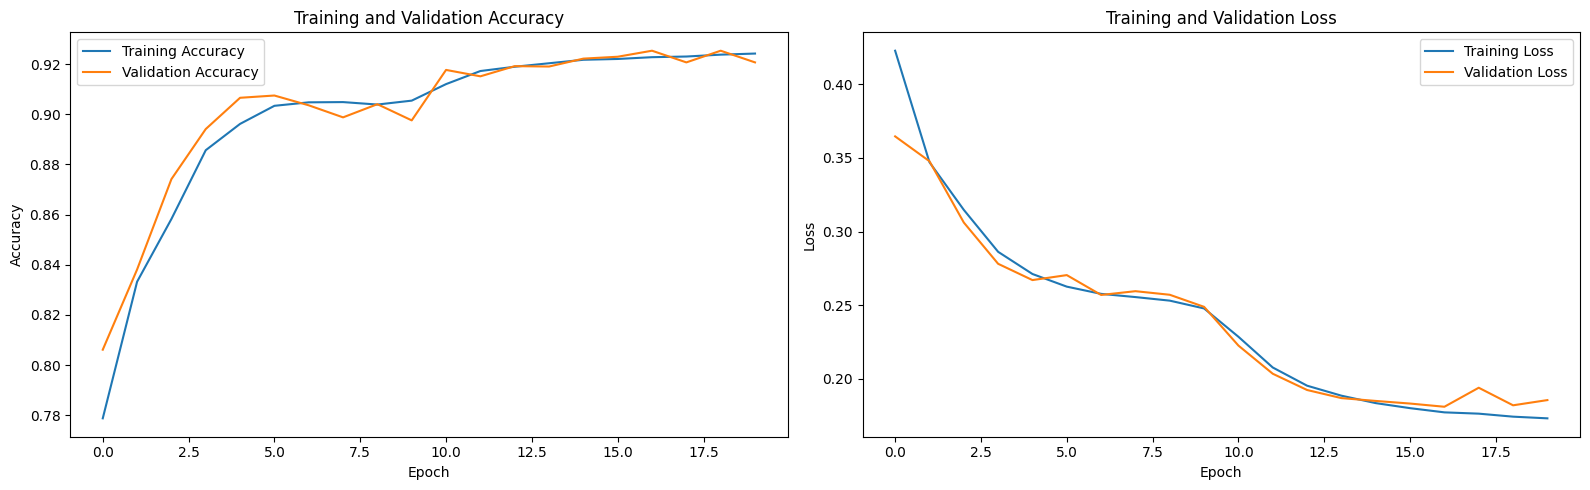

In [78]:
plt.figure(figsize=(16, 5))

# First subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history_func_improved_df["accuracy"], label="Training Accuracy")
plt.plot(history_func_improved_df["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Second subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history_func_improved_df["loss"], label="Training Loss")
plt.plot(history_func_improved_df["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

In [79]:
# predict test
y_pred_func_improve = model_functional_improved.predict(X_test)

y_pred_func_improve = np.where(y_pred_func_improve > 0.65, 1, 0)

116/116 [==============================] - 0s 603us/step


In [80]:
print(classification_report(y_test, y_pred_func_improve))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1672
           1       0.96      0.94      0.95      2028

    accuracy                           0.94      3700
   macro avg       0.94      0.94      0.94      3700
weighted avg       0.94      0.94      0.94      3700



### Best Model Evaluation


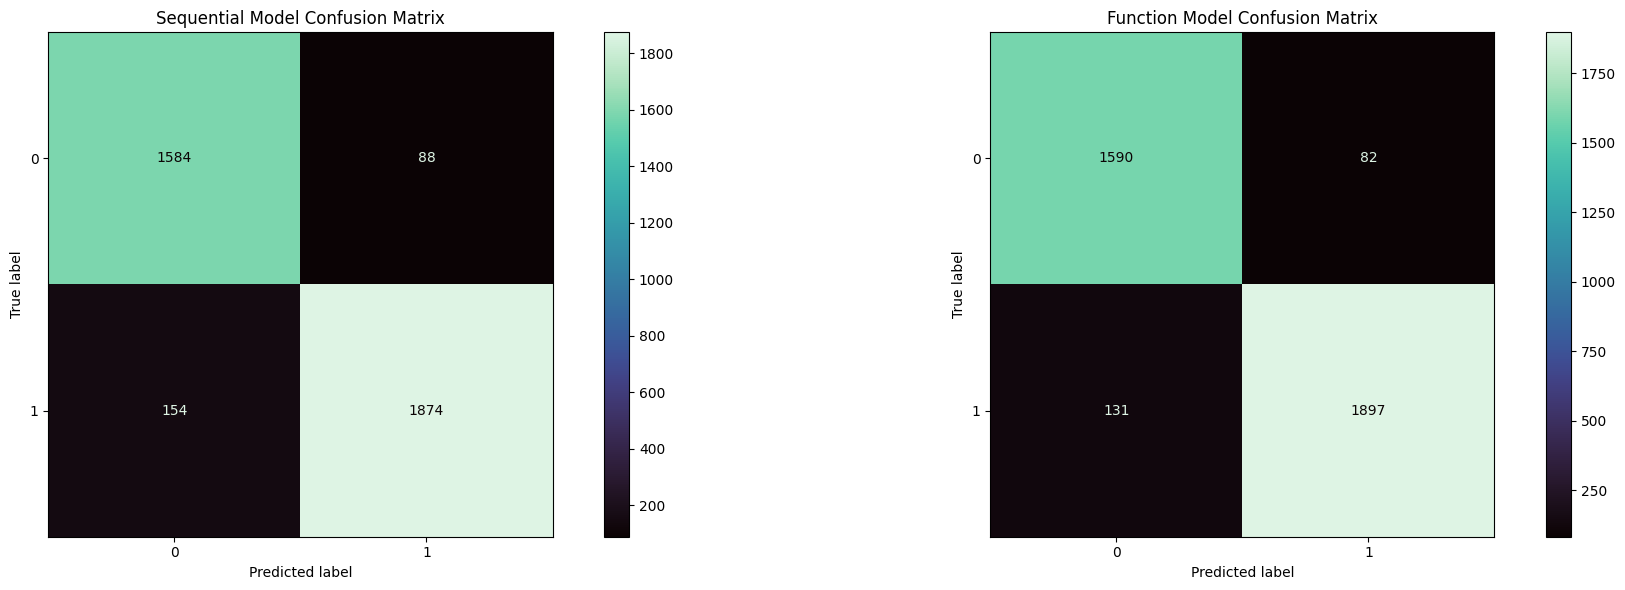

In [81]:
# define confusion matrix for both model
conf_matrix_func = confusion_matrix(y_true=y_test, y_pred=y_pred_func_improve)
conf_matrix_seq = confusion_matrix(y_true=y_test, y_pred=y_pred_seq_improve)

# create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# plot the first confusion matrix in the first subplot
disp_seq = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix_seq, display_labels=[0, 1]
)
disp_seq.plot(cmap="mako", ax=axs[0])
axs[0].set_title("Sequential Model Confusion Matrix")

# plot the second confusion matrix in the second subplot
disp_func = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix_func, display_labels=[0, 1]
)
disp_func.plot(cmap="mako", ax=axs[1])
axs[1].set_title("Function Model Confusion Matrix")

# adjust layout and display the plot
plt.tight_layout()
plt.show()

In [82]:
print("------------------Sequential Improved------------------")
print(classification_report(y_test, y_pred_seq_improve))
print("\n------------------Functional Improved------------------")
print(classification_report(y_test, y_pred_func_improve))

------------------Sequential Improved------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1672
           1       0.96      0.92      0.94      2028

    accuracy                           0.93      3700
   macro avg       0.93      0.94      0.93      3700
weighted avg       0.94      0.93      0.93      3700


------------------Functional Improved------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1672
           1       0.96      0.94      0.95      2028

    accuracy                           0.94      3700
   macro avg       0.94      0.94      0.94      3700
weighted avg       0.94      0.94      0.94      3700



functional perform better


## 07 - Model Saving


In [83]:
# save column transformer
with open("column_transformer.pkl", "wb") as file_1:
    pickle.dump(col_transformers, file_1)

In [84]:
# freeze model and save model
model_functional.trainable = False
model_functional.save("functional_model.keras")

## 08 - Model Inferencing


In [85]:
# load model
with open("column_transformer.pkl", "rb") as file_1:
    column_transfomer_model = pickle.load(file_1)

functional_ann_model = load_model("./functional_model.keras")

In [119]:
data_inf = [{
        "age": 62,
        "region_category": "Town",
        "membership_category": "No Membership",
        "joined_through_referral": "Yes",
        "preferred_offer_types": "Credit/Debit Card Offers",
        "medium_of_operation": "Both",
        "internet_option": "Wi-Fi",
        "days_since_last_login": 17,
        "avg_time_spent": 52.17,
        "avg_transaction_value": 5751.99,
        "avg_frequency_login_days": 20.0,
        "points_in_wallet": 103.69272559078036,
        "used_special_discount": "Yes",
        "offer_application_preference": "No",
        "past_complaint": "No",
        "complaint_status": "Not Applicable",
        "feedback": "Negative",
}]

data_inf = pd.DataFrame(data_inf)

data_inf

,age,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,62,Town,No Membership,Yes,Credit/Debit Card Offers,Both,Wi-Fi,17,52.17,5751.99,20.0,103.692726,Yes,No,No,Not Applicable,Negative


In [122]:
data_inf_transform = column_transfomer_model.transform(data_inf)
y_pred_inf = functional_ann_model.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.65, 1, 0)

if y_pred_inf[0] == 1:
    print("Customer potentially Churn")
else:
    print("Customer potentially Don't Churn")

1/1 [==============================] - 0s 19ms/step
Customer potentially Churn
